# 1D Harmonic Damped Oscillator

## Problem to be studied and solved

### Description
In this project, we solve a damped harmonic oscillator in one-dimension whose governing equation is give as

\begin{equation}
m \frac{d^2 x}{dt^2} + \mu \frac{dx}{dt} + k x = 0,
\label{1D_harmonic_oscillator_equation} \tag{1}
\end{equation}

where $x$ is the coordinate location of the oscillator, $m$ is the mass of the oscillator, $\mu$ is the viscosity/damping/friction coefficient, and $k$ is the spring constant. The question now is to solve this differential equation for $x(t)$.

### Solution
The above equation can be transformed to 

$$ \frac{d^2 x}{dt^2} + \frac{\mu}{m} \frac{dx}{dt} + \frac{k}{m} x = 0 $$

which is a linear, homogeneous, second-order differential equation with constant coefficients. Commonly, exponential ansatz is chosen to solve such differential equation. This ansatz posits that the solution to such a differential equation is given as follows

\begin{equation}
x(t) = C e^{\lambda t}.
\label{exponential_ansatz} \tag{2}
\end{equation}

Now, substituting \eqref{exponential_ansatz} in \eqref{1D_harmonic_oscillator_equation} and by taking the appropriate first and second derivatives, we get the following form of the quadratic equation in $\lambda$

\begin{equation}
\lambda^2 + \frac{\mu}{m} \lambda + \frac{k}{m} = 0,
\label{lambda_equation} \tag{3}
\end{equation}

which has the following set of two solutions

\begin{equation}
\lambda_{1, 2} = \frac{\mu}{m} \pm \sqrt{\left(\frac{\mu}{2m}\right)^2 - \frac{k}{m}}.
\label{lambda_solutions} \tag{4}
\end{equation}

Now, simplifying the terms with the substituion of $\delta = \mu/2m$ and $\omega_0 = \sqrt{k/m}$, we get the solutions to be

\begin{equation}
\lambda_{1, 2} = \delta \pm \sqrt{\delta^2 - \omega_0^2}
\label{lambda_equation_simplification} \tag{5}
\end{equation}

Now, based on the value of the discriminant (the terms inside the square root - $<0$ or $=0$ or $>0$, the physics of the problem differs, i.e., 

1. $\delta^2 - \omega_0^2 > 0 \Rightarrow \delta > \omega_0$ Over-damped case, i.e., the amplitude of the oscillations decrease over time due to higher value of damping coefficient compared to spring constant
2. $\delta^2 - \omega_0^2 = 0 \Rightarrow \delta = \omega_0$ Critically damped case, i.e., spring & damping forces cancel each other.
3. $\delta^2 - \omega_0^2 < 0 \Rightarrow \delta < \omega_0$ Under-damped case, i.e., oscillations damp over time but not exponential decrease in damping like over-damped case.

Each of the three options requires a different approach to the solution. The general solution of the homogeneous differential equation has the form

\begin{equation}
x(t) = C_1 x_1(t) + C_2 x_2(t),
\label{general_solution} \tag{6}
\end{equation}

where $x_1(t)$ and $x_2(t)$ are determined by the value of the discriminant (i.e., $\delta^2 - \omega_0^2$) in \eqref{lambda_equation_simplification}.


### Case under investigation

#### Under-damped case
Currently, we implement an under-damped case of the 1D harmonic oscillator, i.e., we choose the case with $\delta < \omega_0 \Rightarrow \delta^2 - \omega_0^2 < 0 \Rightarrow$ $\lambda_1$ and $\lambda_2$ are complex numbers. Now, using the exponential ansatz of $x(t) = C e^{\lambda t}$ to $x_1(t)$ and $x_2(t)$, we get

$$ x_1(t) = C_1 e^{\lambda_1 t} \,\, \text{and} \,\, x_2(t) = C_2 e^{\lambda_2 t}. $$

Now, substituting these values in \eqref{general_solution}, we get the final solution after simplification and variable changes [1] to be 

\begin{equation}
x(t) = e^{-\delta t} \left( 2 A \cos \left(\phi + \omega t \right) \right),
\label{under_damped_solution} \tag{7}
\end{equation}

where $A$ is the amplitude of oscillation, $\phi (= \phi_1)$ is the phase angle of the oscillation, $\omega = \sqrt{\omega_0^2 - \delta^2}$. The constants can be determined using the initial conditions of the problem.

In this project, we take the following initial conditions of the oscillator

$$ x(0) = 1 \,\, \text{and} \,\, \frac{dx}{dt} = 0 $$

## Coding setup

Before launching jupyter notebook, run the following commands in the terminal [2]

1. conda create -n pinn python=3
2. conda activate pinn
3. conda install jupyter numpy matplotlib
4. conda install pytorch torchvision torchaudio -c pytorch

Once the virtual environmen of pinn is activated, launch the jupyter notebook which will automatically import all the packages installed in this virtual environment (see steps 3 and 4 above).

In [2]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn

In [26]:
# Define the functions to be used

## Function to save the training progress plots in gif for animation purpose
def save_gif_PIL(outfile, files, fps=5, loop=0):
    imgs = [Image.open(file) for file in files]
    imgs[0].save(fp=outfile, format='GIF', append_images=imgs[1:], save_all=True, duration=int(1000/fps), loop=loop)

## Computes the analytical solution of the 1D harmonic damped oscillator
## Equations to be solved are taken from [1, 2]
def oscillator(d, w0, x):
    assert d < w0
    w = np.sqrt(w0**2-d**2)
    phi = np.arctan(-d/w)
    A = 1/(2*np.cos(phi))
    cos = torch.cos(phi+w*x)
    sin = torch.sin(phi+w*x)
    exp = torch.exp(-d*x)
    y  = exp*2*A*cos
    return y

## Class defining a fully connected network (FCN)
class FCN(nn.Module):
    
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])
        self.fch = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(N_HIDDEN, N_HIDDEN),
                            activation()]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)
        
    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x

## Function outputting the plots of the neural network training
def plot_result(x,y,x_data,y_data,yh,xp=None):
    plt.figure(figsize=(8,4))
    plt.plot(x,y, color="black", linewidth=2, alpha=0.8, label="Exact solution")
    plt.plot(x,yh, color="red", linestyle="dashed", linewidth=2, alpha=0.8, label="Neural network prediction")
    plt.scatter(x_data, y_data, s=60, color="blue", alpha=0.8, label='Training data')
    if xp is not None:
        plt.scatter(xp, -0*torch.ones_like(xp), s=60, color="green", alpha=0.8, 
                    label='Physics loss training locations')
    l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
    plt.setp(l.get_texts(), color="k")
    plt.xlim(-0.05, 1.05)
    plt.ylim(-1.1, 1.1)
    plt.text(1.065,0.7,"Training step: %i"%(i+1),fontsize="xx-large",color="k")
    plt.axis("off")

## Generate the training data
Now, in order to train our neural network (NN) model, we generate training data which forms the ground truth and is obtained from a portion of the true analytical solution. To that end, we choose $\delta = 2$ and $\omega_0 = 20$ for the NN model to learn the solution in the domain $x \in [0, 1]$.

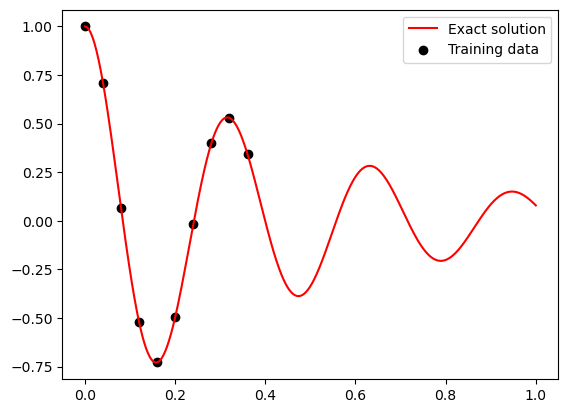

In [12]:
d, w0 = 2, 20

# get the analytical solution over the full domain
x = torch.linspace(0,1,500).view(-1,1)
y = oscillator(d, w0, x).view(-1,1)
####print(x.shape, y.shape)

# slice out a small number of points from the LHS of the domain
x_data = x[0:200:20]
y_data = y[0:200:20]
####print(x_data.shape, y_data.shape)

plt.figure()
plt.plot(x, y, color="red", label="Exact solution")
plt.scatter(x_data, y_data, color="black", label="Training data")
plt.legend()
plt.show()

## Standard Neural Network (sNN)
In this subsection, we train a standard neural network (i.e., non-physics informed NN which gets trained purely due to the available data). The two metrics we are going to use are
1. how well does the NN model in the vicinity of training data points?
2. how well does the NN model away from the vicinity of the training data points? (i.e., how we does it model the physics of the problem irrespective of the data)

To that end, we are minimizing the following loss function (LF)

\begin{equation}
\text{Loss function (LF)}  = \frac{1}{N} \sum\limits_{i = 1}^{N} \left( u_{\mathrm{NN}}(x_i; w_i) - u_{\mathrm{truth}}(x_i) \right)^2,
\label{loss_function_standard_NN} \tag{8}
\end{equation}

where $N$ is the sample size, $u_{\mathrm{truth}}(x_i)$ is the analytical solution for the input $x_i$ and the NN weight $w_i$, and $u_{\mathrm{NN}}(x_i, w_i)$ is the predicted value from the NN model.

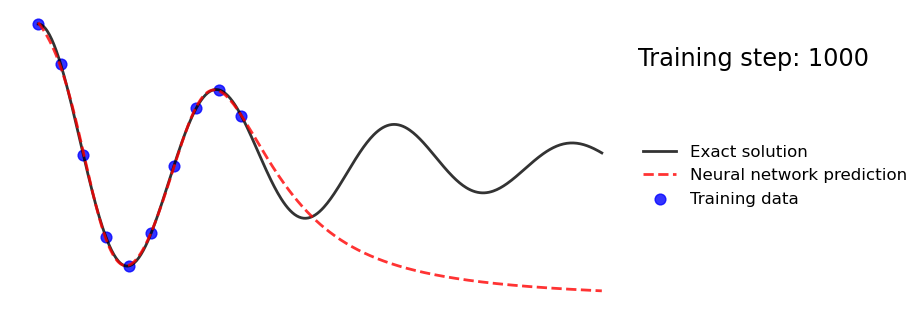

In [27]:
torch.manual_seed(123)
model = FCN(1,1,32,3)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)
files = []

# Training the standard NN model
num_steps_training_NN = 1000

for i in range(num_steps_training_NN):
    optimizer.zero_grad()
    yh = model(x_data)
    loss = torch.mean((yh-y_data)**2) # loss function = mean squared error
    loss.backward()
    optimizer.step()
        
    # plot the result as training progresses
    if (i+1) % 10 == 0: 
        
        yh = model(x).detach()
        
        plot_result(x,y,x_data,y_data,yh)
        
        file = "plots/nn/nn_%.8i.png"%(i+1)
        plt.savefig(file, bbox_inches='tight', pad_inches=0.1, dpi=100, facecolor="white")
        files.append(file)
        
        # display the plot every fixed number of iterations
        if (i+1) % 1000 == 0:
            plt.show()
        else: 
            plt.close("all")
            
save_gif_PIL("nn.gif", files, fps=20, loop=0)

#### Observation & Inferences
We observe that the NN models the physics in the vicinity of the training data well but fails to capture the physics away from the training data points. It is no surprise to observe such a behavior. In fact, this is due to the fact that the NN model is trained in a data-driven manner. However, it is possible to correct this error by adding physics of the system into the NN model.

## Physics Informed Neural Network (PINN)
The physics informed neural network (PINN) adds the physical components into the loss function to make the model comply with the physical laws. This is carried out by sampling a set of input training locations $(\{x_j\})$ and passing them through the network. Next, the gradients of the network’s output with respect to its input are computed at these locations (which are typically analytically available for most neural networks, and can be easily computed using autodifferentiation). Finally, the residual of the underlying differential equation is computed using these gradients, and added as an extra term called "physics loss" in the loss function [2]. The physics loss aims to ensure that the learned solution is consistent with the underlying differential equation. 

For example, the data that was presented above pertain to the damped harmonic oscillator which has a governing equation and an analytical solution. Now, in order to convert a data-driven sNN to a PINN, we change the loss function to a physics informed loss function (PILF)

\begin{equation}
\text{PILF} = \underbrace{\frac{1}{N} \sum\limits_{i = 1}^{N} \left( u_{\mathrm{NN}}(x_i; w_i) - u_{\mathrm{truth}}(x_i) \right)^2}_{\text{Numerical/Data-fitting loss}} + \underbrace{\frac{1}{M} \sum\limits_{j=1}^{M} \left( \left[ m \frac{d^2}{dx^2} + \mu \frac{d}{dx} + k \right] u_{\mathrm{NN}}(x_j; w_i) \right)^2}_{\text{Physics loss}}
\label{loss_function_PINN} \tag{9}
\end{equation}

In our case, we evaluate the physics loss at 30 points uniformly spaced over the problem domain $[0, 1]$. We then calculate the derivatives of the network's solution (i.e., predicted values) with respect to its input variable at these points using pytorch's autodifferentiation features using which the residual of the differential equation can be readily computed.

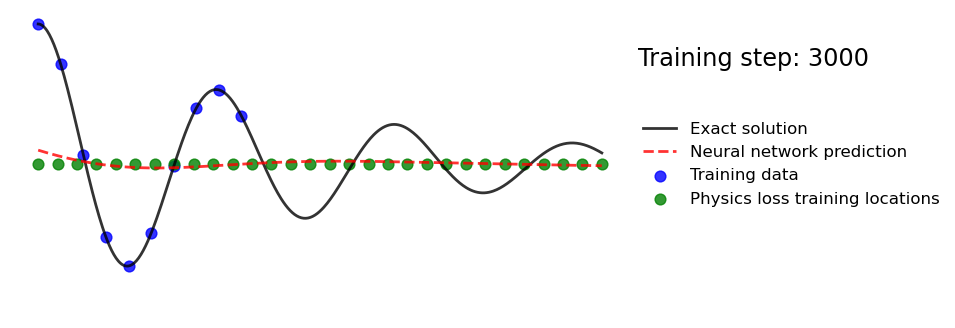

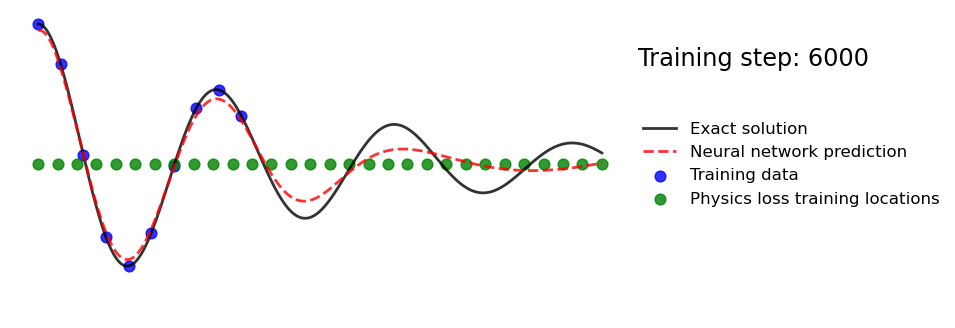

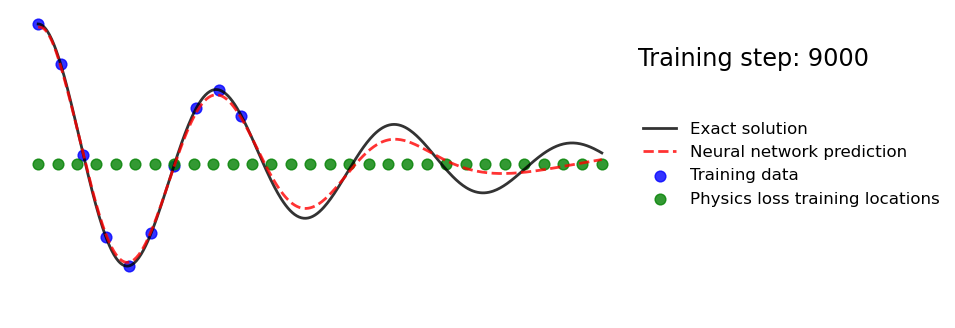

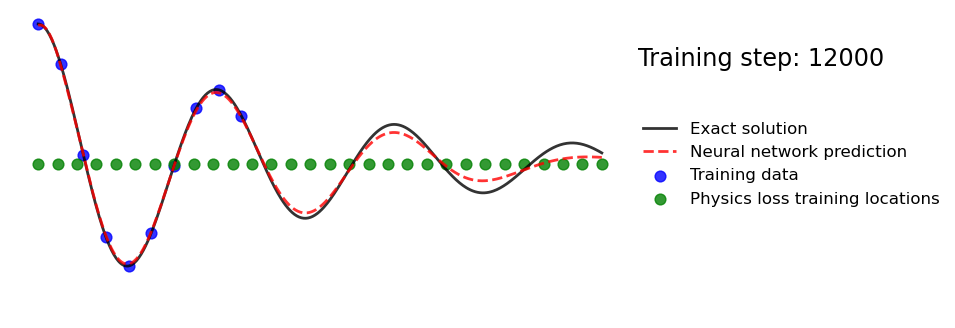

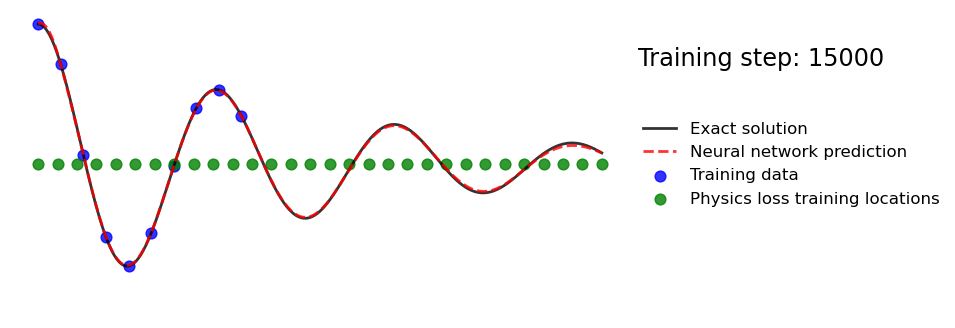

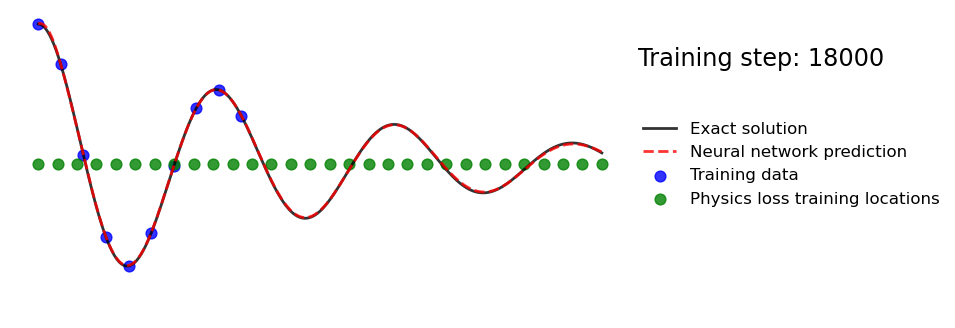

In [29]:
# Sampling locations over the problem domain for the input variable to the PINN
x_physics = torch.linspace(0,1,30).view(-1,1).requires_grad_(True)

# Constants
mu, k = 2*d, w0**2

torch.manual_seed(123)
model = FCN(1,1,32,3)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-4)
files = []

# Training the PINN
num_steps_training_PINN = 20000

for i in range(num_steps_training_PINN):
    optimizer.zero_grad()
    
    # "Numerical/Data-fitting loss" computation
    yh = model(x_data)
    loss1 = torch.mean((yh-y_data)**2)# use mean squared error
    
    # "Physics loss" computation
    yhp = model(x_physics)
    dx  = torch.autograd.grad(yhp, x_physics, torch.ones_like(yhp), create_graph=True)[0]# computes dy/dx
    dx2 = torch.autograd.grad(dx,  x_physics, torch.ones_like(dx),  create_graph=True)[0]# computes d^2y/dx^2
    physics = dx2 + mu*dx + k*yhp# computes the residual of the 1D harmonic oscillator differential equation
    loss2 = (1e-4)*torch.mean(physics**2)
    
    # Backpropagate the total loss
    loss = loss1 + loss2# add two loss terms together
    loss.backward()
    optimizer.step()
    
    # Store the result as plots as training progresses
    if (i+1) % 150 == 0:
        
        yh = model(x).detach()
        xp = x_physics.detach()
        
        plot_result(x,y,x_data,y_data,yh,xp)
        
        file = "plots/pinn/pinn_%.8i.png"%(i+1)
        plt.savefig(file, bbox_inches='tight', pad_inches=0.1, dpi=100, facecolor="white")
        files.append(file)
        
        # Display the plots for every 5000 training steps
        if (i+1) % 1000 == 0:
            plt.show()
        else:
            plt.close("all")
            
save_gif_PIL("pinn.gif", files, fps=20, loop=0)

#### References
1. https://benmoseley.blog/my-research/so-what-is-a-physics-informed-neural-network/
2. https://beltoforion.de/en/harmonic_oscillator/
3. Lagaris, I. E., Likas, A., & Fotiadis, D. I. (1998). Artificial neural networks for solving ordinary and partial differential equations. IEEE Transactions on Neural Networks.
4. Raissi, M., Perdikaris, P., & Karniadakis, G. E. (2019). Physics-informed neural networks: A deep learning framework for solving forward and inverse problems involving nonlinear partial differential equations. Journal of Computational Physics.